420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2020 - Spécialisation technique en Intelligence Artificielle<br/>
MIT License - Copyright (c) 2020 Mikaël Swawola
<br/>
![Travaux Pratiques - Optimisation des hyperparamètres 101](static/17-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la recherche des meilleurs hyperparamètres appliqués à l'ensemble des algorithmes vus en cours jusqu'à maintenant. Le jeu de données utilisée sera **Titanic**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Exercice 1 - Chargement et exploration sommaire des données

In [3]:
import pandas as pd

titanic = pd.read_csv('../../data/titanic_train.csv', index_col='PassengerId')

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns

# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, })
sns.set(rc={'figure.figsize':(11.7,8.27)})

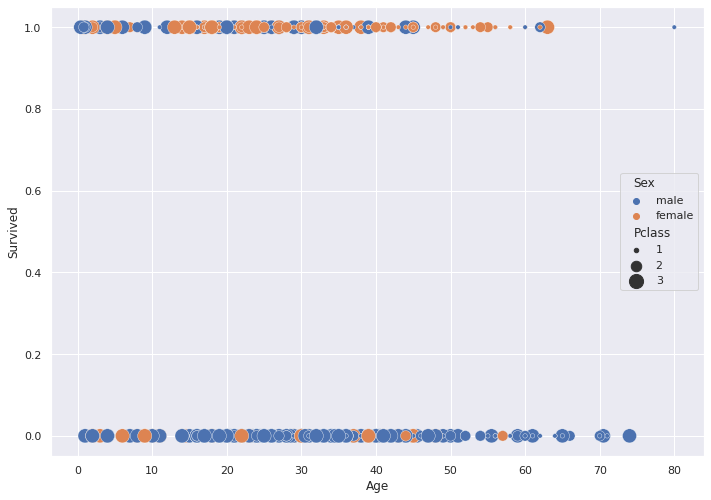

In [5]:
_ = sns.scatterplot(x='Age', y='Survived', hue='Sex', size='Pclass', sizes=(20, 200), data=titanic)

#### Conversion des variables `embarked` et `sex`

In [6]:
titanic = pd.get_dummies(titanic, columns=['Embarked'], prefix = ['emb'], drop_first=True)
titanic['Sex'] = (titanic['Sex'] == 'female').astype(int)
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'emb_Q', 'emb_S'],
      dtype='object')

In [7]:
X = titanic[['Age', 'Sex','Pclass','SibSp','Parch','Fare','emb_Q','emb_S']]
y = titanic['Survived']

#### Vérification de la proportion des classes positives (Survided) et négatives (Died) 

In [10]:
y.sum()/len(y)

0.3838383838383838

#### Imputation des valeurs manquantes

Les valeurs manquantes seront imputées pour l'exercice pour simplififer

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median').fit(X)
X = imp.transform(X)
X

array([[22.    ,  0.    ,  3.    , ...,  7.25  ,  0.    ,  1.    ],
       [38.    ,  1.    ,  1.    , ..., 71.2833,  0.    ,  0.    ],
       [26.    ,  1.    ,  3.    , ...,  7.925 ,  0.    ,  1.    ],
       ...,
       [28.    ,  1.    ,  3.    , ..., 23.45  ,  0.    ,  1.    ],
       [26.    ,  0.    ,  1.    , ..., 30.    ,  0.    ,  0.    ],
       [32.    ,  0.    ,  3.    , ...,  7.75  ,  1.    ,  0.    ]])

#### Préparation du jeu de test

In [12]:
#from sklearn.model_selection import train_test_split

In [13]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2021)

## Exercice 2 - Recherche sur grille

### 2-1 - Régression logistique

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from helpers import plot_roc_curve

[class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [15]:
# 1 - Definit la grille : Hyperparamètres: C, 11_ratio - Autres: constants - DONE !
# 2 - Instancier l'estimateur LogisticRegression - DONE !
# 3 - Effectuer le GridSearchCV - 5 plis, ROC_AUC

In [21]:
parameters = {
    "C": [0.09, 0.1, 0.11],
    "l1_ratio": [0.9,1,1.1]
}

logreg = LogisticRegression(
    penalty="elasticnet",
    max_iter=10000,
    solver="saga",
    random_state=2021,
    class_weight="balanced")

grid = GridSearchCV(logreg, parameters, cv=10, scoring="roc_auc", verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82905127 0.82894822        nan 0.82849655 0.82893796        nan
 0.82893148 0.82926311        nan]
  warnings.warn(


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, penalty='elasticnet',
                                          random_state=2021, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.09, 0.1, 0.11], 'l1_ratio': [0.9, 1, 1.1]},
             scoring='roc_auc', verbose=1)

In [22]:
print(f'Meilleurs paramètres: {grid.best_params_}')
print(f'Meilleur score (mean CV): {grid.best_score_}')

Meilleurs paramètres: {'C': 0.11, 'l1_ratio': 1}
Meilleur score (mean CV): 0.8292631138884001


#### Vérification du meilleur score

In [25]:
cv_score = cross_val_score(grid.best_estimator_, X_train, y_train, cv=10, scoring="roc_auc", verbose=1, n_jobs=-1)
cv_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


0.8292631138884001

#### Aire sous la courbe

In [27]:
y_train_pred_proba_logreg = grid.best_estimator_.predict_proba(X_train)[:,1]
print(f'AUC = {roc_auc_score(y_train, y_train_pred_proba_logreg)}')

AUC = 0.8375882583682008


#### Courbe ROC

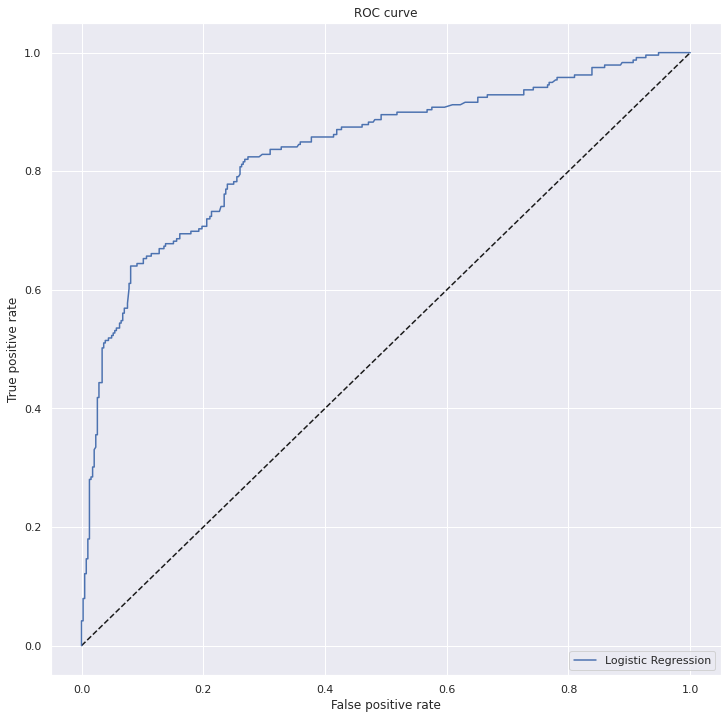

In [28]:
results = {}
results['Logistic Regression'] = y_train_pred_proba_logreg
plot_roc_curve(results, y_train)

### 2-2 - K plus proches voisins

In [45]:
from sklearn.neighbors import KNeighborsClassifier

[class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [46]:
parameters = {
    "n_neighbors": [5, 10, 20, 30, 40, 50],
    "p": [1,2],
    "weights": ['uniform','distance'],
}

clf_knn = KNeighborsClassifier()

clf_knn_grid = GridSearchCV(clf_knn, parameters, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1, refit=True)
clf_knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 20, 30, 40, 50], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [47]:
print(f'Meilleurs paramètres: {clf_knn_grid.best_params_}')
print(f'Meilleur score (mean CV): {clf_knn_grid.best_score_}')
#clf_knn_grid.cv_results_

Meilleurs paramètres: {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Meilleur score (mean CV): 0.7630498514177126


#### Aire sous la courbe

In [48]:
y_train_pred_proba_knn = clf_knn_grid.best_estimator_.predict_proba(X_train)[:,1]
print(f'AUC = {roc_auc_score(y_train, y_train_pred_proba_knn)}')

AUC = 0.9991773448396095


#### Courbe ROC

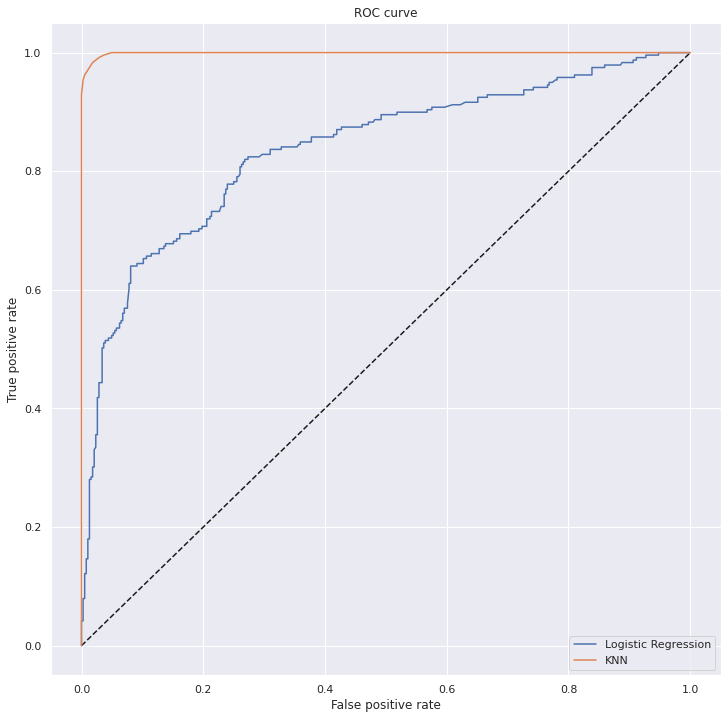

In [49]:
results['KNN'] = y_train_pred_proba_knn
plot_roc_curve(results, y_train)

## Exercice 3 - Recherche aléatoire

### 3-1 - Arbres de décision

In [50]:
from sklearn.utils.fixes import loguniform
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

[class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [52]:
# Distributions des paramètres
distributions = dict(
    criterion=['gini', 'entropy'],
    ccp_alpha=loguniform(1e-3, 1e3),
    max_depth=randint(2, 128))


# Estimateur
clf_tree = DecisionTreeClassifier(random_state=2021)

# Recherche aléatoire avec avec validation croisée
clf_tree_rnd = RandomizedSearchCV(clf_tree, distributions, n_iter=1000, cv=5, scoring="roc_auc", verbose=2, n_jobs=-1, random_state=2021)

In [53]:
clf_tree_rnd.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f70a93216a0>,
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f70a9321040>},
                   random_state=2021, scoring='roc_auc', verbose=2)

In [54]:
print(f'Meilleurs paramètres: {clf_tree_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf_tree_rnd.best_score_}')

Meilleurs paramètres: {'ccp_alpha': 0.013062037157514004, 'criterion': 'entropy', 'max_depth': 125}
Meilleur score (mean CV): 0.8519597621956244


#### Aire sous la courbe

In [55]:
y_train_pred_proba_tree = clf_tree_rnd.best_estimator_.predict_proba(X_train)[:,1]
print(f'AUC = {roc_auc_score(y_train, y_train_pred_proba_tree)}')

AUC = 0.8682989016736402


#### Courbe ROC

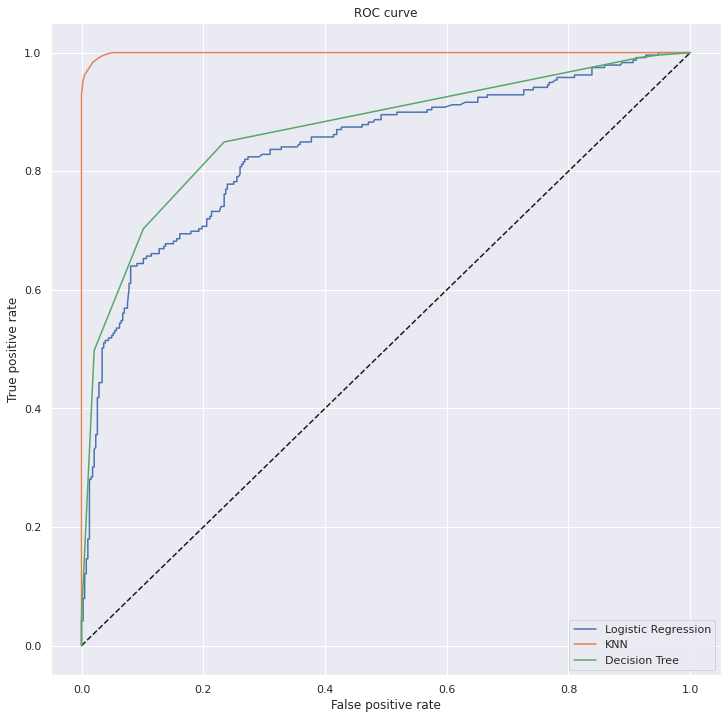

In [56]:
results['Decision Tree'] = y_train_pred_proba_tree
plot_roc_curve(results, y_train)

### 3-2 - Bagging

[class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

#### Aire sous la courbe

#### Courbe ROC

## Exercice 4 - Hyperopt avec Forêts aléatoires et gradient boosting

### 4-1 - Gradient boosting

#### Définition de l'hyperespace

#### Fonction objective

#### Lancement de l'optimisation

#### Meilleurs paramètres

#### Réentraînement du gradient boosting avec les meilleurs hyperparamètres

#### Aire sous la courbe

#### Courbe ROC

### 4-2 - Gradient boosting et forêts aléatoires (optionnel)

## Exercice 5 - Performances sur le jeu de tests

#### Aire sous la courbe

#### Courbe ROC